In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

cab_data = pd.read_csv('Cab_data.csv')
city_data = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [3]:
#Checking for duplicate values and missing values

print("cab_data original shape: ",cab_data.shape)
print ("cab_data (after removing duplicates) shape: ",cab_data.shape)
cab_data.dropna()

print("city_data original shape: ",city_data.shape)
city_data.drop_duplicates()
print("city_data (after removing duplicates) shape: ",city_data.shape)
city_data.dropna()

print("customer_id original shape: ",customer_id.shape)
customer_id.drop_duplicates()
print("customer_id (after removing duplicates) shape: ",customer_id.shape)
customer_id.dropna()

print("transaction_id original shape: ",transaction_id.shape)
transaction_id.drop_duplicates()
print("transaction_id (after removing duplicates) shape: ",transaction_id.shape)
transaction_id.dropna()


cab_data original shape:  (359392, 7)
cab_data (after removing duplicates) shape:  (359392, 7)
city_data original shape:  (20, 3)
city_data (after removing duplicates) shape:  (20, 3)
customer_id original shape:  (49171, 4)
customer_id (after removing duplicates) shape:  (49171, 4)
transaction_id original shape:  (440098, 3)
transaction_id (after removing duplicates) shape:  (440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [4]:
# Merging all datasets together based on foreign keys
import pandas as pd
transaction_id = pd.read_csv('Transaction_ID.csv')


master_data = (transaction_id.merge(cab_data, how = 'inner')).merge(customer_id, how = 'inner').merge(city_data, how = 'inner')

# Inserted new column of profits made with one transaction
master_data.insert(loc= 9,
          column='Profit',
          value=master_data['Price Charged'] - master_data['Cost of Trip'])

# Inserted price of per KM of travel
master_data.insert(loc= 6,
          column='Price per KM',
          value=master_data['Price Charged'] / master_data['KM Travelled'])

# Inserted price of per KM of travel
master_data.insert(loc= 7,
          column='Profit per KM',
          value=master_data['Profit'] / master_data['KM Travelled'])

index = 0
for date in master_data['Date of Travel']:
    days_since_2016 = date - 42364
    if days_since_2016 >= 0 and days_since_2016 <= 335:
        master_data.at[index, 'Year'] = 2021
    elif days_since_2016 <= 700:
        master_data.at[index, 'Year'] = 2022
    else:
        master_data.at[index, 'Year'] = 2023
    index = index + 1
    
rides_count = master_data['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name='Number of Rides')
master_data = pd.merge(master_data, rides_count, on='Customer ID')


master_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,Price per KM,Profit per KM,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Population,Users,Year,Number of Rides
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,12.182266,1.882266,30.45,370.95,313.6350,57.3150,Male,28,10813,"814,885","24,701",2021.0,3
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,12.526904,0.826904,28.62,358.52,334.8540,23.6660,Male,27,9237,"814,885","24,701",2021.0,4
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,13.849558,3.049558,9.04,125.20,97.6320,27.5680,Male,53,11242,"814,885","24,701",2021.0,4
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,11.377751,0.777751,33.17,377.40,351.6020,25.7980,Male,23,23327,"814,885","24,701",2021.0,4
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,13.129439,1.929439,8.73,114.62,97.7760,16.8440,Male,33,8536,"814,885","24,701",2021.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,43108,Yellow Cab,WASHINGTON DC,14.425000,1.225000,4.80,69.24,63.3600,5.8800,Male,24,15651,"418,859","127,001",2023.0,22
359388,10440104,53286,Cash,43104,Yellow Cab,WASHINGTON DC,13.541667,0.821667,8.40,113.75,106.8480,6.9020,Male,32,6528,"418,859","127,001",2023.0,12
359389,10440105,52265,Cash,43105,Yellow Cab,WASHINGTON DC,15.750270,3.150270,27.75,437.07,349.6500,87.4200,Male,56,7966,"418,859","127,001",2023.0,11
359390,10440106,52175,Card,43105,Yellow Cab,WASHINGTON DC,16.612500,3.652500,8.80,146.19,114.0480,32.1420,Male,32,6423,"418,859","127,001",2023.0,16


In [5]:
print('Pink Cab Rows: ', len(master_data[master_data['Company'] == 'Pink Cab']))
print('Yellow Cab Rows: ', len(master_data[master_data['Company'] == 'Yellow Cab']))
print('Pink Cab has', 274681/84711, 'times more rows than Yellow Cab')

#Yellow cab dataset is more represented.

Pink Cab Rows:  84711
Yellow Cab Rows:  274681
Pink Cab has 3.2425659005323983 times more rows than Yellow Cab


In [6]:
print('Average age of Pink Cab customers: ', master_data[master_data['Company'] == 'Pink Cab']['Age'].mean())
print('Average age of Yellow Cab customers: ', master_data[master_data['Company'] == 'Yellow Cab']['Age'].mean())

#Same age groups for both companies

Average age of Pink Cab customers:  35.322413854162974
Average age of Yellow Cab customers:  35.34111205361856


In [7]:
print('Average income for Pink Cab customers: ', master_data[master_data['Company'] == 'Pink Cab']['Income (USD/Month)'].mean())
print('Average income for Yellow Cab customers: ', master_data[master_data['Company'] == 'Yellow Cab']['Income (USD/Month)'].mean())

#Same income bracket for both companies

Average income for Pink Cab customers:  15059.04713673549
Average income for Yellow Cab customers:  15045.669816987705


In [8]:
print('Average profit for Pink Cab: ', master_data[master_data['Company'] == 'Pink Cab']['Profit'].mean())
print('Average profit for Yellow Cab: ', master_data[master_data['Company'] == 'Yellow Cab']['Profit'].mean())

#Yellow Cab has higher profit per transaction

Average profit for Pink Cab:  62.65217410961977
Average profit for Yellow Cab:  160.25998584103016


In [9]:
print('Average profit per KM for Pink Cab: ', master_data[master_data['Company'] == 'Pink Cab']['Profit per KM'].mean())
print('Average profit per KM for Yellow Cab: ', master_data[master_data['Company'] == 'Yellow Cab']['Profit per KM'].mean())

#Yellow Cab has higher profit per KM

Average profit per KM for Pink Cab:  2.769907700396534
Average profit per KM for Yellow Cab:  7.105507808353117


Pink Cab average profit made per Transaction 2021: 62.78542221058146
Pink Cab average profit made per Transaction 2022: 67.44435470475032
Pink Cab average profit made per Transaction 2023: 58.40679605784179


Yellow Cab average profit made per Transaction 2021: 171.39917606410478
Yellow Cab average profit made per Transaction 2022: 171.13147693265412
Yellow Cab average profit made per Transaction 2023: 143.47844697502345


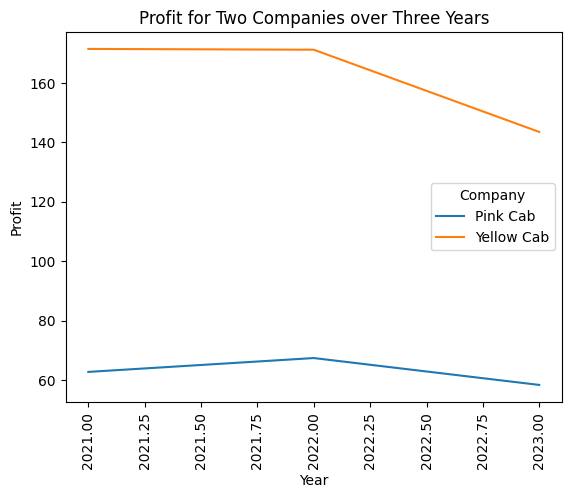

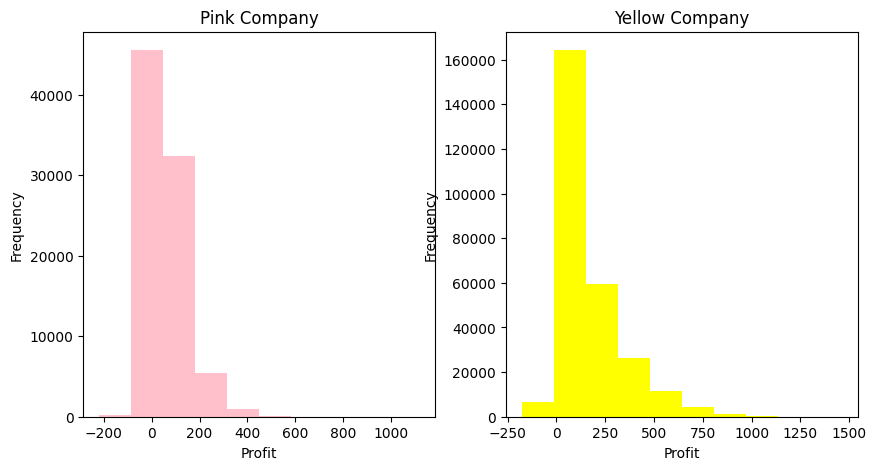

In [10]:
#Hypothesis on profit margins between the two companies per transaction.

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2021)]

pink_2021 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2021:", pink_2021)

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2022)]

pink_2022 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2022:", pink_2022)

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2023)]

pink_2023 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2023:", pink_2023)
print('\n')

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2021)]

yellow_2021 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2021:", yellow_2021)

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2022)]

yellow_2022 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2022:", yellow_2022)

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2023)]

yellow_2023 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2023:", yellow_2023)

profit_data = pd.DataFrame({
    'Year': [2021, 2022, 2023, 2021, 2022, 2023],
    'Company': ['Pink Cab', 'Pink Cab', 'Pink Cab', 'Yellow Cab', 'Yellow Cab', 'Yellow Cab'],
    'Profit': [pink_2021, pink_2022, pink_2023, yellow_2021, yellow_2022, yellow_2023]
})

pivot_table = pd.pivot_table(profit_data, values='Profit', index='Year', columns='Company')

# Plotting the pivot table as a line graph

import matplotlib.pyplot as plt
pivot_table.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit for Two Companies over Three Years')
plt.xticks(rotation=90)
plt.show()

pink_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_data = master_data[master_data['Company'] == 'Yellow Cab']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.hist(pink_data['Profit'], bins=10, color='pink')
ax1.set_title('Pink Company')
ax1.set_xlabel('Profit')
ax1.set_ylabel('Frequency')

ax2.hist(yellow_data['Profit'], bins=10, color='yellow')
ax2.set_title('Yellow Company')
ax2.set_xlabel('Profit')
ax2.set_ylabel('Frequency')

plt.show()

#Conclusion: Yellow Cab has higher profit margins than Pink Cab.

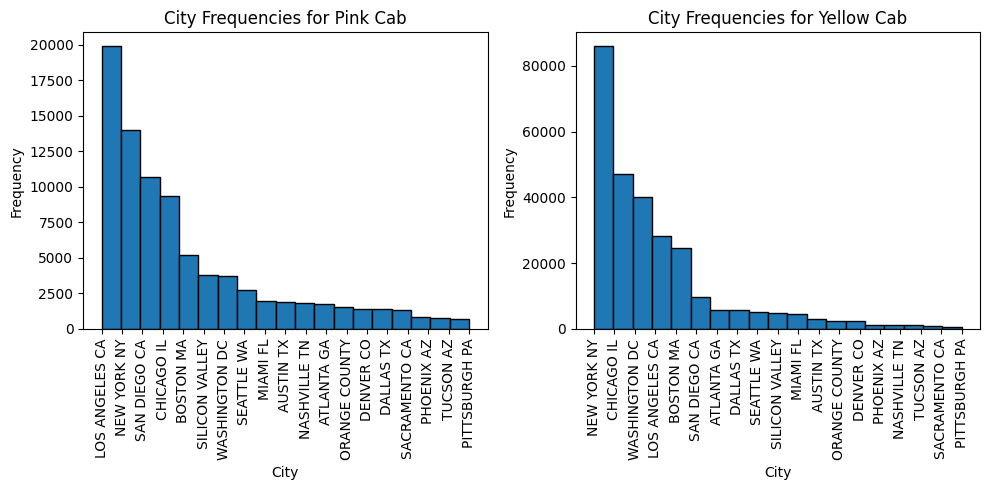

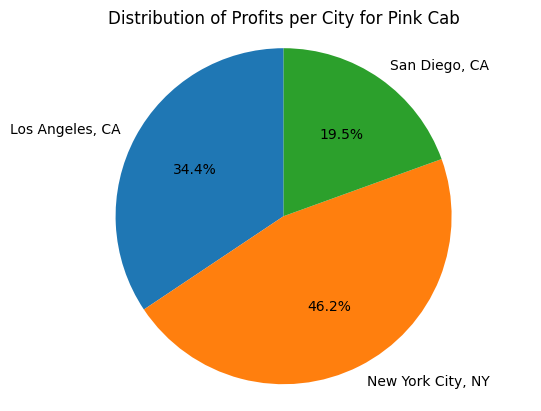

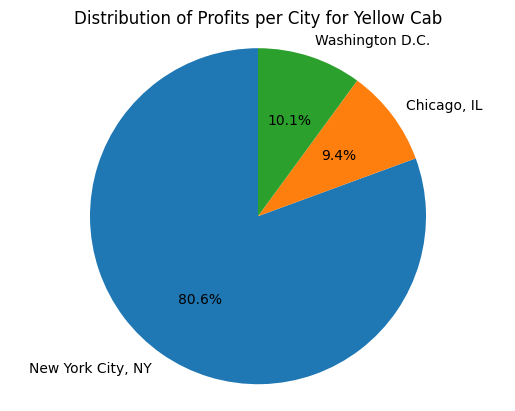

In [11]:
#Hypothesis for distribution patterns of the two company profits per location

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, company in enumerate(master_data['Company'].unique()):
    city_counts = master_data.loc[master_data['Company'] == company, 'City'].value_counts()
    axs[i].hist(city_counts.index, weights=city_counts.values, bins=len(city_counts), edgecolor='black')
    axs[i].set_title(f'City Frequencies for {company}')
    axs[i].set_xlabel('City')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

pink_LA = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'LOS ANGELES CA'), 'Profit'].sum()

pink_NYC = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'NEW YORK NY'), 'Profit'].sum()

pink_SD = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'SAN DIEGO CA'), 'Profit'].sum()

pink_data = [pink_LA, pink_NYC, pink_SD]
pink_labels = ['Los Angeles, CA', 'New York City, NY', 'San Diego, CA']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Pink Cab')
plt.axis('equal')

plt.show()


yellow_NYC = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'NEW YORK NY'), 'Profit'].sum()

yellow_CHI = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'CHICAGO IL'), 'Profit'].sum()

yellow_DC = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'WASHINGTON DC'), 'Profit'].sum()

yellow_data = [yellow_NYC, yellow_CHI, yellow_DC]
yellow_labels = ['New York City, NY', 'Chicago, IL', 'Washington D.C.']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Yellow Cab')
plt.axis('equal')

plt.show()

#Conclusion: Based on locations, profit distribution is higher in New York City for both companies, but Yellow Cab has a higher profit margin in New York City compared to Pink Cab. Pink Cab has a higher profit margin in Los Angeles, CA compared to Yellow Cab.

Pink Cab Number of Young Adults: 18568
Pink Cab Number of Middle Adults: 9972
Pink Cab Number of Older Adults: 3458
Pink Cab Number of Elderly: 332
Yellow Cab Number of Young Adults: 22960
Yellow Cab Number of Middle Adults: 12324
Yellow Cab Number of Older Adults: 4221
Yellow Cab Number of Elderly: 391


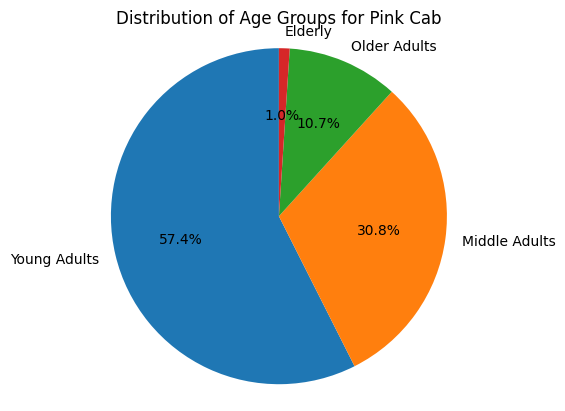

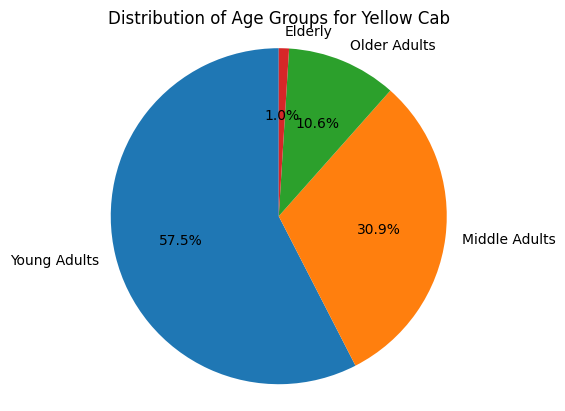

(-1.0999988812321313,
 1.0999992692924283,
 -1.0999999957454367,
 1.0999999997974017)

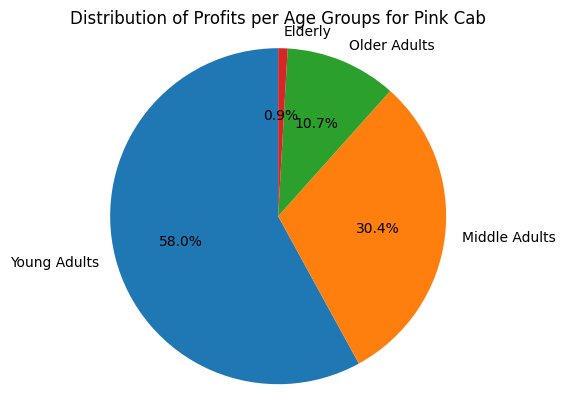

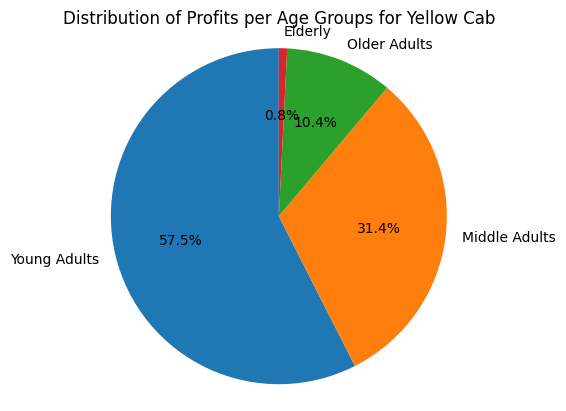

In [12]:
#Hypothesis for distribution patterns of the two company profits per age group

# Identifying age groups
pink_cab_young_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Customer ID'].nunique()
pink_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Customer ID'].nunique()
pink_cab_older_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Customer ID'].nunique()
pink_cab_elderly = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 65), 'Customer ID'].nunique()
print("Pink Cab Number of Young Adults:", pink_cab_young_adults)
print("Pink Cab Number of Middle Adults:", pink_cab_middle_adults)
print("Pink Cab Number of Older Adults:", pink_cab_older_adults)
print("Pink Cab Number of Elderly:", pink_cab_elderly)

yellow_cab_young_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Customer ID'].nunique()
yellow_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Customer ID'].nunique()
yellow_cab_older_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Customer ID'].nunique()
yellow_cab_elderly = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 65), 'Customer ID'].nunique()
print("Yellow Cab Number of Young Adults:", yellow_cab_young_adults)
print("Yellow Cab Number of Middle Adults:", yellow_cab_middle_adults)
print("Yellow Cab Number of Older Adults:", yellow_cab_older_adults)
print("Yellow Cab Number of Elderly:", yellow_cab_elderly)

# Graphing age group distributions
pink_data = [pink_cab_young_adults, pink_cab_middle_adults, pink_cab_older_adults, pink_cab_elderly]
pink_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups for Pink Cab')
plt.axis('equal')

yellow_data = [yellow_cab_young_adults, yellow_cab_middle_adults, yellow_cab_older_adults, yellow_cab_elderly]
yellow_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups for Yellow Cab')
plt.axis('equal')

plt.show()


# Profits per age group
pink_cab_young_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Profit'].sum()
pink_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Profit'].sum()
pink_cab_older_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Profit'].sum()
pink_cab_elderly = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 65), 'Profit'].sum()

pink_data = [pink_cab_young_adults, pink_cab_middle_adults, pink_cab_older_adults, pink_cab_elderly]
pink_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per Age Groups for Pink Cab')
plt.axis('equal')


yellow_cab_young_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Profit'].sum()
yellow_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Profit'].sum()
yellow_cab_older_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Profit'].sum()
yellow_cab_elderly = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 65), 'Profit'].sum()

yellow_data = [yellow_cab_young_adults, yellow_cab_middle_adults, yellow_cab_older_adults, yellow_cab_elderly]
yellow_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per Age Groups for Yellow Cab')
plt.axis('equal')

#Conclusion: Both companies have the same age group distribution, but Yellow Cab has a higher profit margin in all age groups compared to Pink Cab.

Pink Cab number of cash transactions: 33992
Pink Cab number of card transactions: 50719


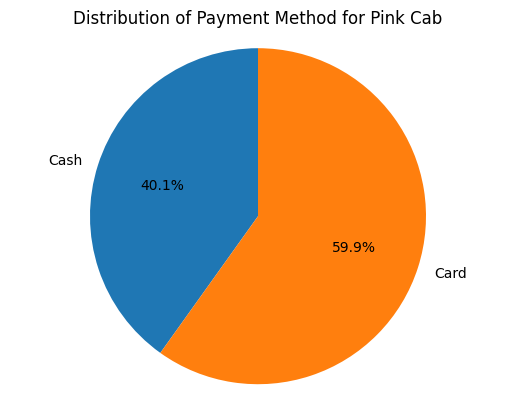

Yellow Cab number of cash transactions: 109896
Yellow Cab number of card transactions: 164785


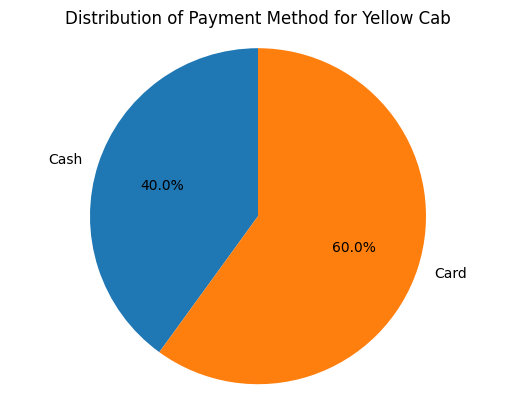

Pink average profit cash transaction: 62.56547222875971
Pink average profit card transaction: 62.71028192590547
Yellow average profit cash transaction: 160.68187439397246
Yellow average profit card transaction: 159.97862610310406




In [13]:
#Hypothesis on payments made by Credit card vs cash transactions

pink_num_cash = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash')].shape[0]

pink_num_card = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card')].shape[0]

print("Pink Cab number of cash transactions:", pink_num_cash)
print("Pink Cab number of card transactions:", pink_num_card)

pink_data = [pink_num_cash, pink_num_card]
pink_labels = ['Cash', 'Card']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Method for Pink Cab')
plt.axis('equal')
plt.show()


yellow_num_cash = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash')].shape[0]

yellow_num_card = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card')].shape[0]

print("Yellow Cab number of cash transactions:", yellow_num_cash)
print("Yellow Cab number of card transactions:", yellow_num_card)

yellow_data = [yellow_num_cash, yellow_num_card]
yellow_labels = ['Cash', 'Card']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Method for Yellow Cab')
plt.axis('equal')
plt.show()



pink_cash_avg_profit = master_data.loc[(master_data['Company'] == 'Pink Cab') &
                                       (master_data['Payment_Mode'] == 'Cash'),
                                       'Profit'].mean()

pink_card_avg_profit = master_data.loc[(master_data['Company'] == 'Pink Cab') &
                                       (master_data['Payment_Mode'] == 'Card'),
                                       'Profit'].mean()

yellow_cash_avg_profit = master_data.loc[(master_data['Company'] == 'Yellow Cab') &
                                       (master_data['Payment_Mode'] == 'Cash'),
                                       'Profit'].mean()

yellow_card_avg_profit = master_data.loc[(master_data['Company'] == 'Yellow Cab') &
                                       (master_data['Payment_Mode'] == 'Card'),
                                       'Profit'].mean()

print("Pink average profit cash transaction:", pink_cash_avg_profit)
print("Pink average profit card transaction:", pink_card_avg_profit)
print("Yellow average profit cash transaction:", yellow_cash_avg_profit)
print("Yellow average profit card transaction:", yellow_card_avg_profit)
print("\n")

#Conclusion: Yellow Cab has higher profit margins than Pink Cab. Yellow Cab has more transactions than Pink Cab.
# Young adults are the most represented age group for both companies. Yellow Cab has higher profit margins than Pink Cab.

Pink number of card transactions in 2021: 12559
Pink number of card transactions in 2022: 17716
Pink number of card transactions in 2023: 20444
Pink number of cash transactions in 2021: 8440
Pink number of cash transactions in 2022: 11903
Pink number of cash transactions in 2023: 13649


Yellow number of card transactions in 2021: 41731
Yellow number of card transactions in 2022: 57711
Yellow number of card transactions in 2023: 65343
Yellow number of cash transactions in 2021: 27905
Yellow number of cash transactions in 2022: 38672
Yellow number of cash transactions in 2023: 43319




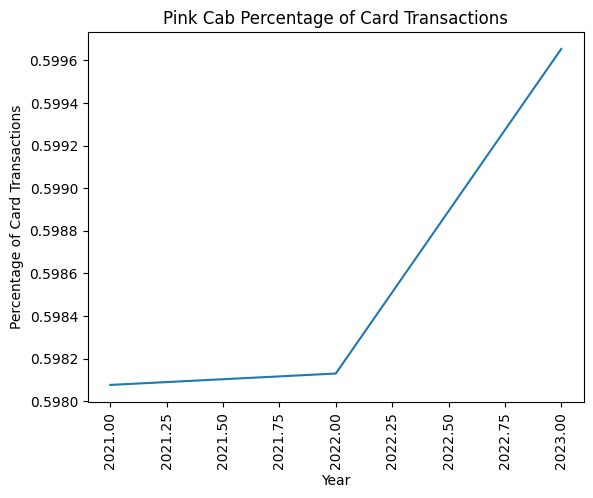

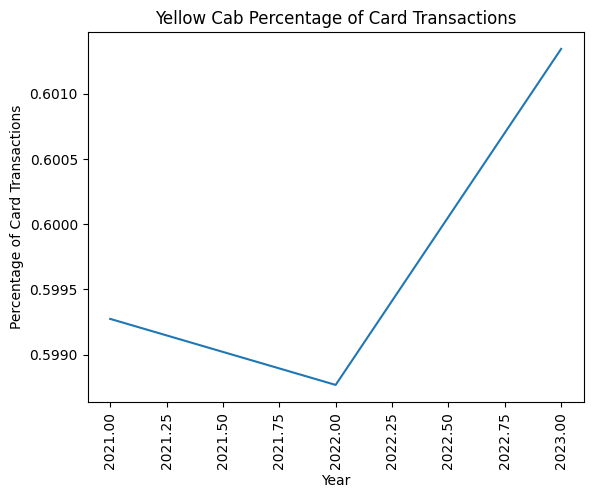

In [14]:
# Hypothesis: Number of card transactions will increase more for Yellow Cab

pink_2021_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2021)].shape[0]

pink_2022_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2022)].shape[0]

pink_2023_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2023)].shape[0]


pink_2021_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2021)].shape[0]

pink_2022_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2022)].shape[0]

pink_2023_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2023)].shape[0]

print("Pink number of card transactions in 2021:", pink_2021_card_num)
print("Pink number of card transactions in 2022:", pink_2022_card_num)
print("Pink number of card transactions in 2023:", pink_2023_card_num)
print("Pink number of cash transactions in 2021:", pink_2021_cash_num)
print("Pink number of cash transactions in 2022:", pink_2022_cash_num)
print("Pink number of cash transactions in 2023:", pink_2023_cash_num)
print("\n")

yellow_2021_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2021)].shape[0]

yellow_2022_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2022)].shape[0]

yellow_2023_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2023)].shape[0]

yellow_2021_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2021)].shape[0]

yellow_2022_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2022)].shape[0]

yellow_2023_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2023)].shape[0]

print("Yellow number of card transactions in 2021:", yellow_2021_card_num)
print("Yellow number of card transactions in 2022:", yellow_2022_card_num)
print("Yellow number of card transactions in 2023:", yellow_2023_card_num)
print("Yellow number of cash transactions in 2021:", yellow_2021_cash_num)
print("Yellow number of cash transactions in 2022:", yellow_2022_cash_num)
print("Yellow number of cash transactions in 2023:", yellow_2023_cash_num)
print('\n')

pink_2021_card_ratio = pink_2021_card_num / (pink_2021_card_num + pink_2021_cash_num)
pink_2022_card_ratio = pink_2022_card_num / (pink_2022_card_num + pink_2022_cash_num)
pink_2023_card_ratio = pink_2023_card_num / (pink_2023_card_num + pink_2023_cash_num)

yellow_2021_card_ratio = yellow_2021_card_num / (yellow_2021_card_num + yellow_2021_cash_num)
yellow_2022_card_ratio = yellow_2022_card_num / (yellow_2022_card_num + yellow_2022_cash_num)
yellow_2023_card_ratio = yellow_2023_card_num / (yellow_2023_card_num + yellow_2023_cash_num)

df = pd.DataFrame({'x': [2021, 2022, 2023], 'y': [pink_2021_card_ratio, pink_2022_card_ratio, pink_2023_card_ratio]})
plt.plot(df['x'], df['y'])
plt.xlabel('Year')
plt.ylabel('Percentage of Card Transactions')
plt.title('Pink Cab Percentage of Card Transactions')
plt.xticks(rotation=90)
plt.show()

df = pd.DataFrame({'x': [2021, 2022, 2023], 'y': [yellow_2021_card_ratio, yellow_2022_card_ratio, yellow_2023_card_ratio]})
plt.plot(df['x'], df['y'])
plt.xlabel('Year')
plt.ylabel('Percentage of Card Transactions')
plt.title('Yellow Cab Percentage of Card Transactions')
plt.xticks(rotation=90)
plt.show()

"""
Conclusion: The two companies' results are strikingly comparable.
About 40% of customers at both organizations report using cash, while about 60% use cards.
This indicates that there aren't any notable distinctions between the two businesses.
The results are also indicated by the line graph, which shows that there will be very little growth in card transactions for either company between 2021 and 2023.
Therefore, it is not possible to conclude which of the two companies fared better based on this analysis's lack of differentiation.
"""

Retained Customers:
  Company
Pink Cab       5775
Yellow Cab    15883
Name: Year, dtype: int64
n\Lost Customers:

  Company
Pink Cab      26555
Yellow Cab    24013
Name: Year, dtype: int64


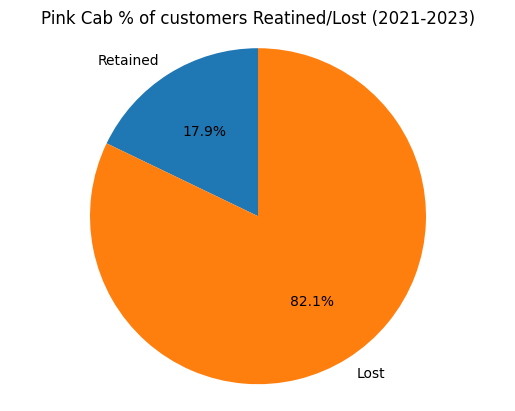

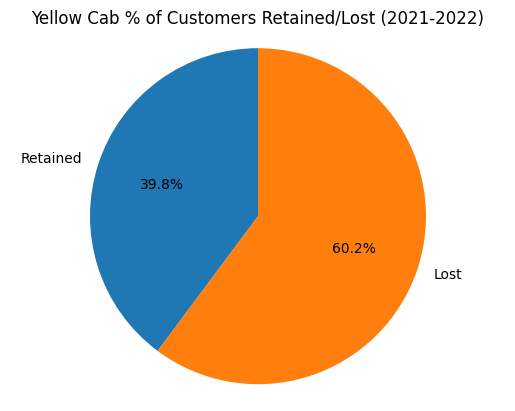

In [15]:
#Hypothesis on the retaininment of more customers over time.

retained_customers = master_data.groupby(['Company', 'Customer ID'])['Year'].nunique()
retained_counts = retained_customers.groupby('Company').apply(lambda x: sum(x == 3))
lost_counts = retained_customers.groupby('Company').apply(lambda x: sum(x < 3))

print("Retained Customers:\n ", retained_counts)
print("n\Lost Customers:\n\n ", lost_counts)

pink_data = [5775, 26555]
pink_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(pink_data, labels = pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab % of customers Reatined/Lost (2021-2023)')
plt.axis('equal')
plt.show()

yellow_data = [15883, 24013]
yellow_labels = ('Retained' , 'Lost')
plt.figure()
plt.pie(yellow_data, labels = yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title("Yellow Cab % of Customers Retained/Lost (2021-2022)")
plt.axis('Equal')
plt.show()

#Conclusion: Pink Cab ratio of lost customers to retained customers is higher as compared to yellow cab company.